In [1]:
# p.132

In [4]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

In [5]:
# !는 시스템 명령어 실행하는 것!
# 터미널에서 하는 명령어를 주피터 상에서 실행할 수 있도록 해줌.
!python --version

Python 3.7.6


In [6]:
# 데이터 셋 만들기
# 데이터 분포를 원으로 만드는 것이 가장 좋음!

import matplotlib.patches as mpatches
from sklearn.datasets import make_blobs, make_circles

In [7]:
def plot_data(pl, X, y):
    pl.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
    pl.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
    pl.legend(['0', '1'])
    return pl

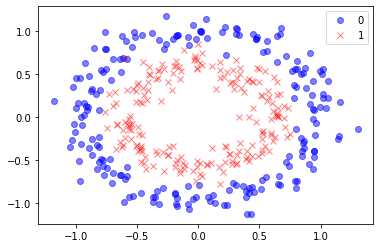

In [8]:
#  해석 다시 보긷
X, y = make_circles(
    n_samples = 400, 
    factor =0.6,
    noise = 0.1,
    random_state = 42
)

pl = plot_data(plt, X, y)
pl.show()

In [9]:
# 랜덤값을 설정하기 위해서 seed 설정
seed = 1

print("X size =", X.shape) 

print("y size =", y.shape)
print("Num of Samples =", X.shape[0])

# 왜 X size가 400, 2일까?
# 400 : Sample의 개수
#   2 : 2차원의 정보 (원에 대한 정보니까 X, y 좌표가 필요하기 때문!)

X size = (400, 2)
y size = (400,)
Num of Samples = 400


In [10]:
# 다시
# 원 추정할 수 있도록 
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)
model = Sequential()

In [11]:
model.add(Dense(1, activation = 'sigmoid', input_dim = 2))
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')

In [13]:
model.fit(X,y, batch_size = 5, epochs = 100, verbose = 1)
# 정확성이 30%정도밖에 안됨

Epoch 1/100
80/80 [==============================] - 0s 737us/step - loss: 0.7640
Epoch 2/100
80/80 [==============================] - 0s 499us/step - loss: 0.7558
Epoch 3/100
80/80 [==============================] - 0s 567us/step - loss: 0.7485
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7421
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7362
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7311
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7265
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7224
Epoch 9/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7188
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7157
Epoch 11/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7131
Epoch 12/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7105
Epoch 13/100
80/80 [===========

In [15]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)

In [16]:
# 다시~
def plot_decision_bound(model, X, y):
    # X shape --> (400, 2)
    # a = x, b = y
    # 최소값, 최대값을 받아와서 범위를 만드는 것.
    amin, bmin = X.min(axis = 0) - 0.1
    amax, bmax = X.max(axis = 0) + 0.1
    print("amin - ", amin)
    print("bmin - ", bmin)
    print("amax - ", amax)
    print("bmax - ", bmax)
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    z = c.reshape(aa.shape)
    
    plt.contourf(aa, bb, z, cmap = 'bwr', alpha = 0.2)
    plot_data(plt, X, y)
    return plt

amin -  -1.2816529526885447
bmin -  -1.222835878671317
amax -  1.405132554307814
bmax -  1.2746496919432166


Text(0.5, 1.0, 'Logistic Regression')

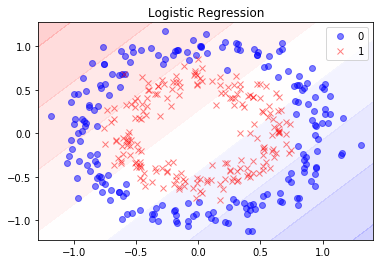

In [17]:
plot_decision_bound(model, X, y)
plt.title("Logistic Regression")